# Neural Networks from scratch

* This notebook contains simple neural network architecture built with:
    * Linear Layer
    * ReLU layer
    * Sigmoid layer

In [1]:
import os
import sys
import numpy as np
sys.path.append(os.path.abspath('/Users/gopimaguluri/Documents/projects/Deep-Learning-Optimized/'))

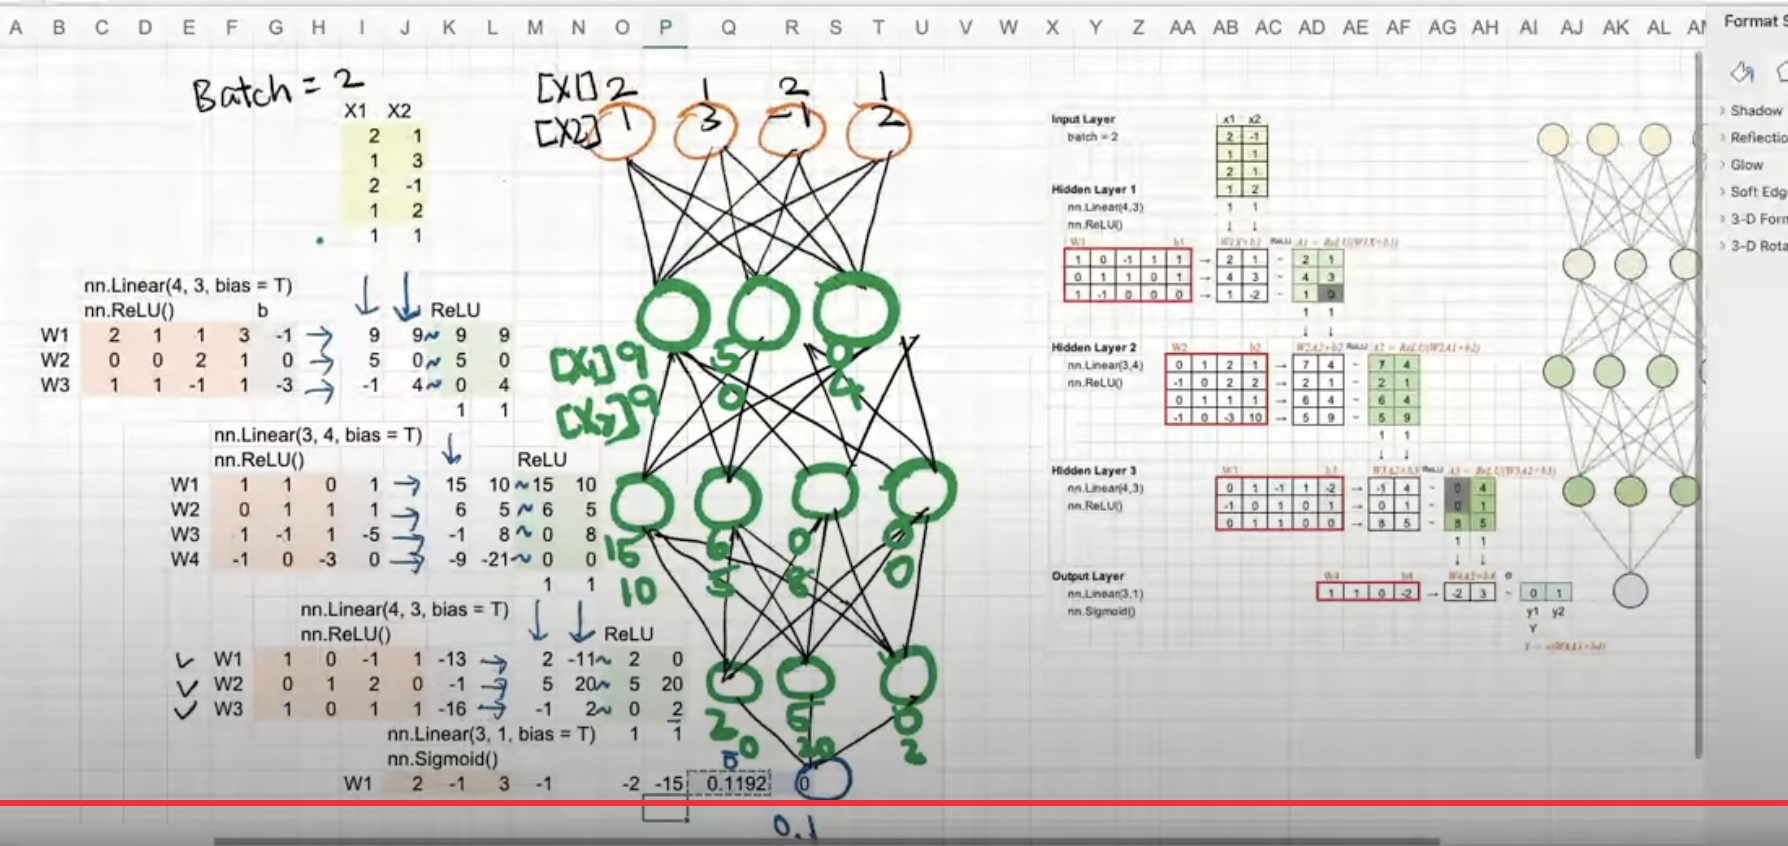

In [2]:
n_features = 250
n_samples = 10000

In [3]:
X = np.random.normal(size=(n_samples, n_features))
X.shape

(10000, 250)

In [4]:
def initialize_weights(n_input_features, n_output_nodes):
    '''
    Remember that the first column of the generated weights is bias
    '''
    return np.random.random_sample((n_output_nodes, n_input_features))-0.3

In [7]:
np.random.random_sample(size=(4,5))

array([[0.85851694, 0.89944684, 0.73714639, 0.13283959, 0.57254458],
       [0.38593498, 0.5321734 , 0.10598332, 0.79468129, 0.73942709],
       [0.3861688 , 0.8119146 , 0.6093004 , 0.47931627, 0.9503268 ],
       [0.8051365 , 0.78881371, 0.13798718, 0.27961839, 0.38433159]])

In [5]:
def Linear_Layer(input_data, weights, batch_size, bias):

    if bias:
        bias_input = np.random.rand(batch_size, 1)
        bias_weights = np.random.rand(weights.shape[0], 1)

    if input_data.shape[0] != batch_size:
        input_data = input_data[:batch_size]

    output = np.hstack((bias_input, input_data)).dot(np.hstack((bias_weights, weights)).T)

    return output

In [6]:
def ReLU(input_data):
    return np.maximum(0, input_data)

In [7]:
def Sigmoid(input_data):
    '''
    Note that input data is already W_i(.)X_i + b
    '''
    return 1/(1-np.exp(input_data))

In [8]:
%%time
# LAYER-1 --> 3 nodes
layer_1_weights = initialize_weights(n_input_features=X.shape[1], n_output_nodes=3)
layer_1_weighted = Linear_Layer(input_data=X, weights=layer_1_weights, batch_size=X.shape[0], bias=True)
layer_1_activated = ReLU(input_data=layer_1_weighted)

CPU times: user 4.71 ms, sys: 5 ms, total: 9.71 ms
Wall time: 11 ms


In [9]:
%%time
# LAYER-2 --> 4 nodes
layer_2_weights = initialize_weights(n_input_features=layer_1_activated.shape[1], n_output_nodes=4)
layer_2_weighted = Linear_Layer(input_data=layer_1_activated, weights=layer_2_weights, batch_size=layer_1_activated.shape[0], bias=True)
layer_2_activated = ReLU(input_data=layer_2_weighted)

CPU times: user 1.2 ms, sys: 1.71 ms, total: 2.91 ms
Wall time: 4.27 ms


In [10]:
%%time
# LAYER-3 --> 199 nodes
layer_3_weights = initialize_weights(n_input_features=layer_2_activated.shape[1], n_output_nodes=199)
layer_3_weighted = Linear_Layer(input_data=layer_2_activated, weights=layer_3_weights, batch_size=layer_2_activated.shape[0], bias=True)
layer_3_activated = ReLU(input_data=layer_3_weighted)

CPU times: user 3.35 ms, sys: 3.22 ms, total: 6.57 ms
Wall time: 5.84 ms


In [11]:
%%time
# LAYER-4 --> 5 nodes
layer_4_weights = initialize_weights(n_input_features=layer_3_activated.shape[1], n_output_nodes=5)
layer_4_weighted = Linear_Layer(input_data=layer_3_activated, weights=layer_4_weights, batch_size=layer_3_activated.shape[0], bias=True)
layer_4_activated = ReLU(input_data=layer_4_weighted)

CPU times: user 1.8 ms, sys: 1.36 ms, total: 3.16 ms
Wall time: 2.48 ms


In [12]:
%%time
# LAYER-5 --> sigmoid output
output_layer_weights = initialize_weights(n_input_features=layer_4_activated.shape[1], n_output_nodes=1)
output_layer_weighted = Linear_Layer(input_data=layer_4_activated, weights=output_layer_weights, batch_size=layer_4_activated.shape[0], bias=True)
output_layer_activated = Sigmoid(input_data=output_layer_weighted)

CPU times: user 460 μs, sys: 687 μs, total: 1.15 ms
Wall time: 482 μs


In [13]:
%%time
layer_1_activated.shape, layer_2_activated.shape, layer_3_activated.shape, layer_4_activated.shape, output_layer_activated.shape

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 2.86 μs


((10000, 3), (10000, 4), (10000, 199), (10000, 5), (10000, 1))

In [15]:
%%time
output_layer_activated

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 4.05 μs


array([[-1.36950685e-07],
       [-1.40480283e-01],
       [-6.38495874e-04],
       ...,
       [-4.51657909e-02],
       [-2.40249509e-04],
       [-3.80206584e-04]])

In [1]:
import os
import sys
import numpy as np
sys.path.append(os.path.abspath('/Users/gopimaguluri/Documents/projects/Deep-Learning-Optimized/'))

from dl_src import *
n_features = 250
n_samples = 10000
X = np.random.normal(size=(n_samples, n_features))
X.shape

(10000, 250)

In [2]:
# LAYER-1 --> 3 nodes
batch_size = X.shape[0]
layer_1 = Linear(n_output_nodes=3, bias=True, batch_size=batch_size, activation='relu').linear_operation(X)

# LAYER-2 --> 4 nodes
layer_2 = Linear(n_output_nodes=4, bias=True, batch_size=batch_size, activation='relu').linear_operation(layer_1)

# LAYER-3 --> 199 nodes
layer_3 = Linear(n_output_nodes=199, bias=True, batch_size=batch_size, activation='relu').linear_operation(layer_2)

# LAYER-4 --> 5 nodes
layer_4 = Linear(n_output_nodes=5, bias=True, batch_size=batch_size, activation='relu').linear_operation(layer_3)

# LAYER-5 --> sigmoid output
sigmoid_layer = Linear(n_output_nodes=1, bias=True, batch_size=batch_size, activation='sigmoid').linear_operation(layer_4)

In [3]:
layer_1.shape, layer_2.shape, layer_3.shape, layer_4.shape, sigmoid_layer.shape

((10000, 3), (10000, 4), (10000, 199), (10000, 5), (10000, 1))